[7.81190202e-01 3.38054200e-04 2.12272460e-05]
848.6734453139065 0.02306096510766777


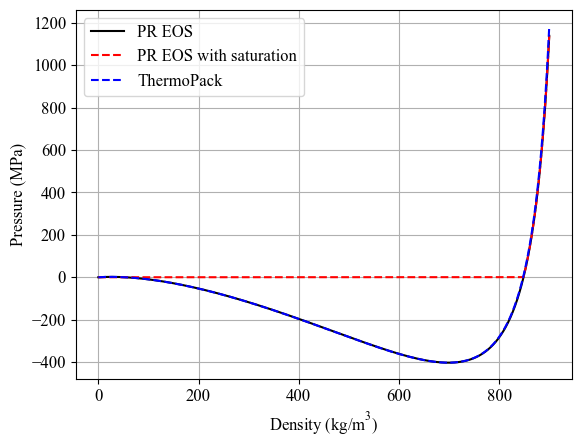

13068860.856333733


In [31]:
# from PIL.Image import v
import numpy as np
import matplotlib.pyplot as plt
from PengRobinson import PengRobinson as pr 
from thermopack.cubic import cubic

Tc = 647.1 # K
Pc = 22.064e6
omega = 0.344
M = 18.015

R = 8.314

pr = pr(Tc, Pc, omega, M, R)

pr_th = cubic('H2O', 'PR')

density_array = np.linspace(0.001, 900.0, 100000)
v_array = M*1e-3/density_array
# v_array = np.linspace(1e-7, 5000.0, 10000) # m^3/mol
# density_array = M*1e-3/v_array
P_array = np.zeros(density_array.size)
P_array_sat = np.zeros(density_array.size)
P_thermopack = np.zeros(density_array.size)
n = np.array([1.0])
for i in range(density_array.size):
    molar_volume = M*1e-3/density_array[i]
    P_array[i] = pr.Get_P_from_rho_and_T(density_array[i], 298.0)
    P_array_sat[i] = pr.Get_P_from_rho_and_T_with_saturation(density_array[i], 298.0)
    P_thermopack[i] = pr_th.pressure_tv(298.0, molar_volume, n)
    
    if(P_array_sat[i] < 0.0):
        raise ValueError("Pressure is negative")

    # if(P_array[i] < 0.0):
    #     plt.plot(density_array[i],P_array[i],'o',color='red')
    # else:
    #     plt.plot(density_array[i],P_array[i],'o',color='black')
    # plt.plot(density_array[i],P_array_sat[i],'o',color='blue')
        # raise ValueError("Pressure is negative")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Set math font to Times New Roman as well
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.plot(density_array,P_array/10**6,'k-',label='PR EOS')
plt.plot(density_array,P_array_sat/10**6,'r--',label='PR EOS with saturation')
plt.plot(density_array,P_thermopack/10**6,'b--',label='ThermoPack')
plt.grid()
plt.xlabel('Density (kg/m$^3$)')
plt.ylabel('Pressure (MPa)')
plt.legend()
# plt.xlim(1e-3,2e-3)
# plt.show()
# plt.plot(v_array, P_array)
# plt.xlim(1e-6,1e-5)
plt.show()

density = 849.9982028078401
P_test = pr.Get_P_from_rho_and_T_with_saturation(density, 298.0)
print(P_test)


In [20]:
import numpy as np
from thermopack.cubic import PengRobinson  # PR EoS class

# --- Initialize PR for pure water ---
pr = PengRobinson('H2O')  # component id "H2O" is in ThermoPack's fluid list

MW_H2O = 0.01801528  # kg/mol

def pressure_from_density_PR_water(rho_kg_m3, T=298.0):
    """
    Compute pressure (Pa) from mass density rho (kg/m^3) at temperature T (K)
    for pure water using Peng-Robinson EoS via ThermoPack.

    Parameters
    ----------
    rho_kg_m3 : array_like
        Mass density[kg/m^3]. Can be scalar or 1D array.
    T : float
        Temperature [K]. Default 298.0.

    Returns
    -------
    p_Pa : np.ndarray
        Pressure [Pa], same shape as input.
    """
    rho = np.asarray(rho_kg_m3, dtype=float)
    if np.any(rho <= 0):
        raise ValueError("Densities must be positive.")

    # Convert mass density -> molar volume:
    # molar density [mol/m^3] = rho / MW; molar volume [m^3/mol] = 1 / molar_density
    Vm = MW_H2O / rho  # m^3/mol

    # ThermoPack TV-interface uses total volume [m^3] and mol numbers [mol].
    # Use 1 mol so "volume" is just the molar volume.
    n = np.array([1.0])

    def p_of_V(V):
        # pressure_tv returns the pressure; depending on version it may be a scalar or a 1-tuple.
        out = pr.pressure_tv(T, float(V), n)
        try:
            return float(out[0])
        except (TypeError, IndexError):
            return float(out)

    p_vals = np.vectorize(p_of_V)(Vm)
    return p_vals


rho_example = np.array([950.0, 997.0, 1050.0])  # kg/m^3
p = pressure_from_density_PR_water(rho_example, T=298.0)
for r, pi in zip(rho_example, p):
    print(f"rho={r:.1f} kg/m^3 -> p={pi:.3e} Pa")


rho=950.0 kg/m^3 -> p=-9.510e+10 Pa
rho=997.0 kg/m^3 -> p=-4.203e+09 Pa
rho=1050.0 kg/m^3 -> p=-3.035e+09 Pa


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2623: RuntimeWarning: invalid value encountered in p_of_V (vectorized)
  outputs = ufunc(*args, out=...)
